In [1]:
import sys
sys.path.append('./pipeline-master')
from util import nifti, parse_patient_xlsx
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from lib.io.seeg import read_contatcs
from lib.io.tvb import read_roi_cntrs
from scipy.spatial.distance import cdist
import importlib


In [2]:
ei_data = pd.read_excel('results/exp10/exp10.68/EI_C1P.xlsx').iloc[0:105,1]
cntcts = pd.read_excel('results/exp10/exp10.68/EI_C1P.xlsx').iloc[0:105,-1]

(array([84., 14.,  1.,  2.,  2.,  1.,  0.,  0.,  0.,  1.]),
 array([0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001,
        0.7000000000000001, 0.8, 0.9, 1.0], dtype=object),
 <a list of 10 Patch objects>)

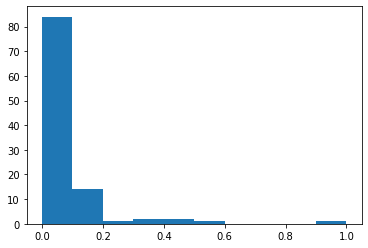

In [3]:
plt.hist(ei_data)

In [4]:
ez_idx_ei_cntcts = ei_data > 0.2
ez_ei_cntcts = cntcts[ez_idx_ei_cntcts]

In [5]:
ez_ei_cntcts

62    TP1-TP2
63    TP2-TP3
64    TP3-TP4
65    TP4-TP5
66    TP5-TP6
67    TP6-TP7
75      A7-A8
Name: Channel, dtype: object

In [6]:
cntcts_file = 'datasets/retro/id030_bf/elec/seeg.xyz'
cntct_pos = read_contatcs(cntcts_file)
ez_cntct_coords = []
for cntct in ez_ei_cntcts:
    c1,c2 = cntct.split('-')
    mdpnt = (cntct_pos[c1] + cntct_pos[c2])/2.0
    ez_cntct_coords.append(mdpnt)

In [7]:
ez_cntct_coords

[array([21.67,  3.03, -4.77]),
 array([25.17 ,  3.13 , -4.915]),
 array([28.665,  3.23 , -5.06 ]),
 array([32.16,  3.33, -5.2 ]),
 array([35.655,  3.43 , -5.34 ]),
 array([39.15 ,  3.525, -5.485]),
 array([ 39.945, -10.7  ,  10.635])]

In [8]:
# import zipfile

# zf = zipfile.ZipFile('datasets/retro/id030_bf/tvb/connectivity.vep.zip')

# roi_cntrs = []
# roi_lbls = []
# with zf.open('centres.txt') as t:
#     for line in t:
#         roi_cntrs.append(line.decode('utf-8').strip().split(' ')[1:])
#         roi_lbls.append(line.decode('utf-8').strip().split(' ')[0])
# roi_cntrs = np.array(roi_cntrs, dtype=float)

cntrs_zipfile = 'datasets/retro/id030_bf/tvb/connectivity.vep.zip'
roi_cntrs, roi_lbls = read_roi_cntrs(cntrs_zipfile)

In [9]:
list(zip(roi_cntrs, roi_lbls))

[(array([-34.6036,  39.8006,  36.339 ]), 'Left-Frontal-pole'),
 (array([-38.9628,  20.8958,  18.9504]), 'Left-Orbito-frontal-cortex'),
 (array([-15.8822,  21.0002,  19.2052]), 'Left-Gyrus-rectus'),
 (array([-51.4727,   3.4786,  27.391 ]), 'Left-F3-Pars-Orbitalis'),
 (array([-60.2973,   9.1107,  37.4046]), 'Left-F3-Pars-triangularis'),
 (array([-58.374 ,  -5.6924,  39.4605]), 'Left-F3-pars-opercularis'),
 (array([-47.7347,   5.8809,  48.6218]), 'Left-Inferior-frontal-sulcus'),
 (array([-46.9718,  22.4462,  52.7131]), 'Left-F2-rostral'),
 (array([-49.0842,  -7.2079,  70.4413]), 'Left-F2-caudal'),
 (array([-38.9108,  22.8921,  53.6736]), 'Left-Middle-frontal-sulcus'),
 (array([-33.0318,  13.2522,  64.4534]), 'Left-SFS-rostral'),
 (array([-35.3353, -11.8608,  72.4569]), 'Left-SFS-caudal'),
 (array([-17.7158,  24.5718,  55.0622]), 'Left-F1-mesial-prefrontal'),
 (array([-18.0537,  -1.9373,  70.8772]), 'Left-PreSMA'),
 (array([-14.5114, -29.674 ,  73.8163]), 'Left-SMA'),
 (array([-26.5091,  3

In [10]:
dists = cdist(ez_cntct_coords, roi_cntrs)

In [38]:
ez_clncl_hyp = np.loadtxt('datasets/retro/id030_bf/tvb/ez_hypothesis.vep.txt')

In [39]:
np.where(ez_clncl_hyp == 1)

(array([ 82, 115, 155]),)

In [37]:
roi_lbls[ez_clncl_hyp]

TypeError: only integer scalar arrays can be converted to a scalar index

In [44]:
ez_clncl_hyp[155]

1.0

In [57]:
np.unique(dists.argsort(axis=1)[:,0:2])

array([115, 116, 121, 123, 134])

In [59]:
np.unique(dists.argmin(axis=1))
# roi_lbls[123]
# roi_lbls[dists.argmin(axis=1)]

array([115, 123])